# MIS: Data Science Programming 
# Group 18 - HW2 
---
## Names - Aishwarya Sarkar, Shubhada Kapre, Krish Engineer, Prathmesh Savale


In [335]:
# Importing pandas and numpy for data wrangling
import pandas as pd
import numpy as np

#read csv file
df = pd.read_csv('NYC_Restaurants.csv', dtype=str, index_col=0)

#check data
df.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection
4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


### Q1. Create a unique name for each restaurant.

In [336]:
#concat all required columns
df['RESTAURANT'] = df['DBA']+ ' '+ df['BUILDING']+ ' '+ df['STREET']+ ' '+ df['ZIPCODE']+ ' '+ df['BORO']

#get the top 10 rows
df['RESTAURANT'].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### Q2. How many restaurants are included in the data?

In [337]:
#get count of unique restaurants
restaurant_cnt= len(df['RESTAURANT'].drop_duplicates())
print(restaurant_cnt)

10114


### Q3. How many chains are there? 

In [338]:
# dropping duplicate restaurant names
agg = pd.DataFrame(df[['DBA','BORO','RESTAURANT', 'BUILDING' , 'STREET', 'ZIPCODE']].drop_duplicates()['DBA'].value_counts())

In [339]:
# count of chains
chains = agg[agg['DBA']>=2]
chains_cnt=len(chains)
chains_cnt

368

### Q4. Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

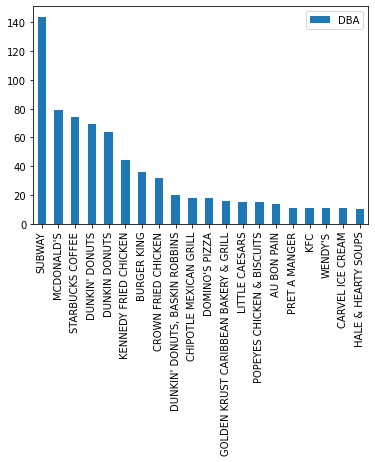

In [340]:
# getting bar plots
chains.iloc[:20].plot(kind ='bar')

### Q5.What fraction of all restaurants are chain restaurants?

In [341]:
# calculate fraction of chain restaurants to total
chain_restaurants_total_cnt=chains['DBA'].sum()
fraction_of_chain_restaurants = chain_restaurants_total_cnt/restaurant_cnt
print(fraction_of_chain_restaurants)

0.16472216729286138


### Q6. Plot the number of non-chain restaurants in each boro.

<AxesSubplot:>

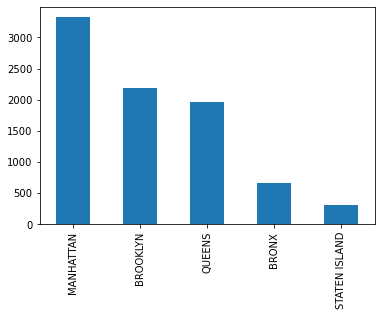

In [342]:
non_chain_restaurants_count= agg[agg['DBA']<2].reset_index()

#merge dataframes to get column for counts of non chain restaurants
non_chain_restaurants = df.merge(non_chain_restaurants_count,how='inner', left_on='DBA',right_on='index')
non_chain_restaurants_by_boro = non_chain_restaurants[non_chain_restaurants['BORO']!='Missing'][['BORO','RESTAURANT']].drop_duplicates()

#plot non chain restaurants in each boro
non_chain_restaurants_by_boro['BORO'].value_counts().plot(kind='bar')

### Q7. Plot the fraction of non-chain restaurants in each boro.

In [343]:
#drop rows where boro='Missing'
restaurants_by_boro = df[['BORO', 'RESTAURANT']][df['BORO']!='Missing'].drop_duplicates()

#get total number of restaurants
restaurants_count_by_boro = restaurants_by_boro.groupby('BORO')['RESTAURANT'].size().reset_index(name='Total restaurants')

In [344]:
#get number of non chain restaurants
non_chain_restaurants_by_boro_count = non_chain_restaurants_by_boro.groupby('BORO')['RESTAURANT'].size().reset_index(name='Non chain restaurant count')

<AxesSubplot:xlabel='BORO'>

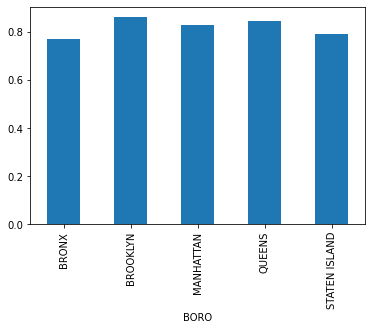

In [345]:
#merge dataframes to get total and non-chain count of restaurants
nonchain_and_total_rest_by_boro= restaurants_count_by_boro.merge(non_chain_restaurants_by_boro_count, how='inner', left_on='BORO', right_on ='BORO')
nonchain_and_total_rest_by_boro['Non chain fraction'] = nonchain_and_total_rest_by_boro['Non chain restaurant count']/nonchain_and_total_rest_by_boro['Total restaurants']

#plot the non chain fractions for each boro
nonchain_and_total_rest_by_boro.set_index('BORO')['Non chain fraction'].plot(kind = 'bar')

In [346]:
# get fraction of non-chain restaurants to the total number of restaurants in the boro
nonchain_and_total_rest_by_boro[['BORO','Non chain restaurant count','Non chain fraction']].head()

,BORO,Non chain restaurant count,Non chain fraction
0,BRONX,659,0.770760
1,BROOKLYN,2180,0.862001
2,MANHATTAN,3323,0.830542
3,QUEENS,1968,0.847910
4,STATEN ISLAND,312,0.791878


No, we see that Brooklyn has the highest ratio for number of non-chain restaurants to the total number of restaurants in the boro. But Manhattan has the highest number of non-chain restaurants

### Q8. Plot the popularity of cuisines.

<AxesSubplot:>

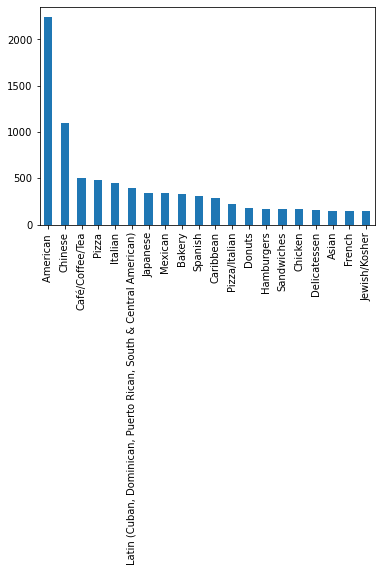

In [347]:
#get top 20 cuisines by popularity

#drop duplicates from the df
cuisine_by_restaurants= df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()
cuisine_by_restaurants['CUISINE DESCRIPTION'].value_counts().iloc[:20].plot(kind='bar')

### Q9. Plot the cuisines among restaurants which never got cited for violations.

<AxesSubplot:>

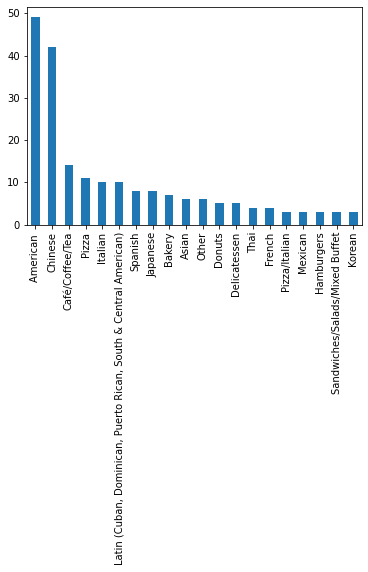

In [348]:
#restaurants which have violations
violations = df[df['VIOLATION CODE'].notnull()]['RESTAURANT'].drop_duplicates()

#get restaurants which never got cited for violations
no_violation_restaurants = df[~df['RESTAURANT'].isin(violations)]['RESTAURANT'].drop_duplicates()

cuisines_for_clean_restaurants=df[df['RESTAURANT'].isin(no_violation_restaurants)][['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()
cuisines_for_clean_restaurants_cnt = cuisines_for_clean_restaurants['CUISINE DESCRIPTION'].value_counts()

#get top 20 cusines for clean restaurants
cuisines_for_clean_restaurants_cnt.iloc[:20].plot(kind='bar')

### Q10. What cuisines tend to be the “cleanest”?

In [349]:
cuisine_by_restaurants_cnt=cuisine_by_restaurants.groupby('CUISINE DESCRIPTION').size().reset_index(name='No of Restaurants')

# get all cuisines for which there were at least 20 restaurants representing that cuisine
cuisine_by_restaurant_cnt_top_20=cuisine_by_restaurants_cnt[cuisine_by_restaurants_cnt['No of Restaurants']>=20]

cuisines_for_clean_restaurants_cnt = cuisines_for_clean_restaurants.groupby('CUISINE DESCRIPTION').size().reset_index(name='No of clean Restaurants')
merged_df=cuisine_by_restaurant_cnt_top_20.merge(cuisines_for_clean_restaurants_cnt, how='inner', left_on ='CUISINE DESCRIPTION', right_on='CUISINE DESCRIPTION')

# get ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine
merged_df['Ratio'] = merged_df['No of clean Restaurants']/ merged_df['No of Restaurants']

#top-10 cuisines with the highest ratios
merged_df.sort_values(by='Ratio', ascending=False)['CUISINE DESCRIPTION'].iloc[:10]

34                        Soul Food
40    Vietnamese/Cambodian/Malaysia
27                            Other
35               Soups & Sandwiches
10                      Continental
4                          Barbecue
1                             Asian
8                           Chinese
14                            Greek
28                         Peruvian
Name: CUISINE DESCRIPTION, dtype: object

### Q11. What are the most common violations in each borough?

In [350]:
#remove 'Missing' boro's
df_without_missing_boro = df[df['BORO']!='Missing']

#create required crosstab table
violation_code_by_boro=pd.crosstab(index=df_without_missing_boro['VIOLATION DESCRIPTION'], columns=df_without_missing_boro['BORO'])

#use idx max to get most common violations
violation_code_by_boro.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### Q12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?

In [351]:
#function to get max values from the crosstab table
def extract_max_from_crosstab(df, value):
    df2 = df[df[value] == max(df[value])]
    return df2.index.tolist()

In [352]:
#find violation frequencies
violationFrequency = df_without_missing_boro['VIOLATION DESCRIPTION'].value_counts()

#normalizing values
violation_code_by_boro_normalized=violation_code_by_boro.divide(violationFrequency, axis=0)

In [353]:
list_of_boros = df['BORO'].unique().tolist()

# removing missing borough
list_of_boros.remove('Missing')

In [354]:
# Getting the list of unique boros and extracting the max value of normalized violations for each
for boro in list_of_boros:
    print('Borough Name:',boro)
    list_of_violations = extract_max_from_crosstab(violation_code_by_boro_normalized, boro)
    print('count of violations:', len(list_of_violations), '\nDetails of violations:')
    print(list_of_violations)

Borough Name: BROOKLYN
count of violations: 1 
Details of violations:
['Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.']
Borough Name: QUEENS
count of violations: 3 
Details of violations:
['Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.', 'Harmful, noxious gas or vapor detected. CO ~1 3 ppm.', 'Raw food not properly washed prior to serving.']
Borough Name: MANHATTAN
count of violations: 2 
Details of violations:
['Out-of package sale of tobacco products observed.', 'Potable water supply inadequate. Water or ice not potable or from unapproved source.  Cross connection in potable water supply system observed.']
Borough Name: BRONX
count of violations: 1 
Details of violations:
['Unprotected food re-served.']
Borough Name: STA

### Q13. How many phone area codes correspond to a single zipcode?

In [355]:
#get area code
df['Area Code']=df['PHONE'].str[:3]

#get group by count for each area code-zip code
areacode_by_zip= df[['Area Code', 'ZIPCODE']].drop_duplicates()
areacode_by_zip_cnt = areacode_by_zip.groupby('Area Code').size().reset_index(name='Count')

#get number of area codes which correspond to only a single zip code
len(areacode_by_zip_cnt[areacode_by_zip_cnt['Count']==1])

34

### Q14. Find common misspellings of street names

In [356]:
nyc_rest_data = df

In [357]:
# creating columns for street type, base and zip
nyc_rest_data['STREET TYPE'] = nyc_rest_data['STREET'].str.split(' ').str[-1]

In [358]:
nyc_rest_data['STREET BASE'] = nyc_rest_data['STREET'].str.split(' ').map(lambda x:' '.join(x[:-1]))

In [359]:
nyc_rest_data['STREET BASE & ZIP'] = nyc_rest_data['STREET BASE'] + ' ' + nyc_rest_data['ZIPCODE']

In [360]:
nyc_rest_street_data =  nyc_rest_data[['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']].drop_duplicates()
# nyc_rest_street_data

In [361]:
# checking if street data is NULL/blank anywhere
blank_street_base = nyc_rest_street_data[(nyc_rest_street_data['STREET BASE'] == np.nan) | (nyc_rest_street_data['STREET BASE'] == '') |
                    (nyc_rest_street_data['STREET BASE'] == ' ')].index

In [362]:
nyc_idx = nyc_rest_street_data.index.tolist()

In [363]:
blank_street_base_idx = blank_street_base.tolist()

In [364]:
nyc_rest_street_data_clean = nyc_rest_street_data.loc[set(nyc_idx).difference(set(blank_street_base_idx))]

C:\Users\aishw\AppData\Local\Temp\ipykernel_24492\903394350.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  nyc_rest_street_data_clean = nyc_rest_street_data.loc[set(nyc_idx).difference(set(blank_street_base_idx))]


In [365]:
nyc_street_data_merged = nyc_rest_street_data_clean.merge(nyc_rest_street_data_clean, left_on=['STREET BASE & ZIP'], right_on=['STREET BASE & ZIP'],
                                                    suffixes=['_left', '_right'])

In [366]:
nyc_street_data_merged_diff = nyc_street_data_merged[nyc_street_data_merged['STREET TYPE_left'] != nyc_street_data_merged['STREET TYPE_right']]

In [367]:
crosstab = pd.crosstab(nyc_street_data_merged_diff['STREET TYPE_left'], nyc_street_data_merged_diff['STREET TYPE_right'])

In [368]:
crosstab_reset = crosstab.reset_index()

In [369]:
list_of_acronyms_to_check = ['ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']

In [370]:
# Getting the max value for each acronym
for acr in list_of_acronyms_to_check:
    print(acr)
    print(crosstab_reset.iloc[extract_max_from_crosstab(crosstab_reset, acr)]['STREET TYPE_left'].values)

ST
['STREET']
RD
['ROAD']
PL
['PLACE']
BOULEARD
['BLVD' 'BOULEVARD']
BULEVARD
['BLVD' 'BOULEVARD']
